Linear Regression
=================

This example demonstrates the use of classes [interp.lstabsdev](http://sporco.rtfd.org/en/latest/modules/sporco.interp.html#sporco.interp.lstabsdev) and [interp.lstmaxdev](http://sporco.rtfd.org/en/latest/modules/sporco.interp.html#sporco.interp.lstmaxdev) for linear regression.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.interp import lstabsdev, lstmaxdev
from sporco import plot
plot.config_notebook_plotting()

Generate reference data

  $$\mathbf{y}_0 = \left( \begin{array}{cc} \mathbf{x} & \mathbf{1} \end{array} \right) \left( \begin{array}{c} p_0 \\ p_1 \end{array} \right)$$

where $\mathbf{1}$ is a column vector of unit entries, $\mathbf{x}$ is the independent variable, $\mathbf{y}_0$ is the dependent variable, and $p_0$ and $p_1$ are the slope and offset respectively of the linear relationship between $\mathbf{y}_0$ and $\mathbf{x}$.

In [2]:
x = np.linspace(-5, 5, 100).astype(np.float32)
A = np.vstack([x, np.ones(len(x))]).T
p = np.array([0.6, 0.2])
y0 = np.dot(A, p)

Construct test data by corrupting the reference data with noise with Gaussian, Laplacian, and uniform distributions.

In [3]:
np.random.seed(123)
yg = y0 + 2.0 * np.random.randn(*y0.shape)
yl = y0 + np.random.laplace(scale=1.5, size=y0.shape)
yu = y0 + np.random.uniform(low=-4.0, high=4.0, size=y0.shape)

Compute least squares solutions for all three test signals.

In [4]:
ygsqr = np.linalg.lstsq(A, yg, rcond=None)[0]
ylsqr = np.linalg.lstsq(A, yl, rcond=None)[0]
yusqr = np.linalg.lstsq(A, yu, rcond=None)[0]

Compute least absolute deviations solutions for all three test signals.

In [5]:
ygabs = lstabsdev(A, yg)
ylabs = lstabsdev(A, yl)
yuabs = lstabsdev(A, yu)

Compute least maximum deviation solutions for all three test signals.

In [6]:
ygmax = lstmaxdev(A, yg)
ylmax = lstmaxdev(A, yl)
yumax = lstmaxdev(A, yu)

Compare performance of each regression method on each test signal. Relative performance is as expected considering that least squares, least absolute deviations, and least maximum deviation are the maximum likelihood (ML) estimators for Gaussian, Laplacian, and uniform noise respectively.

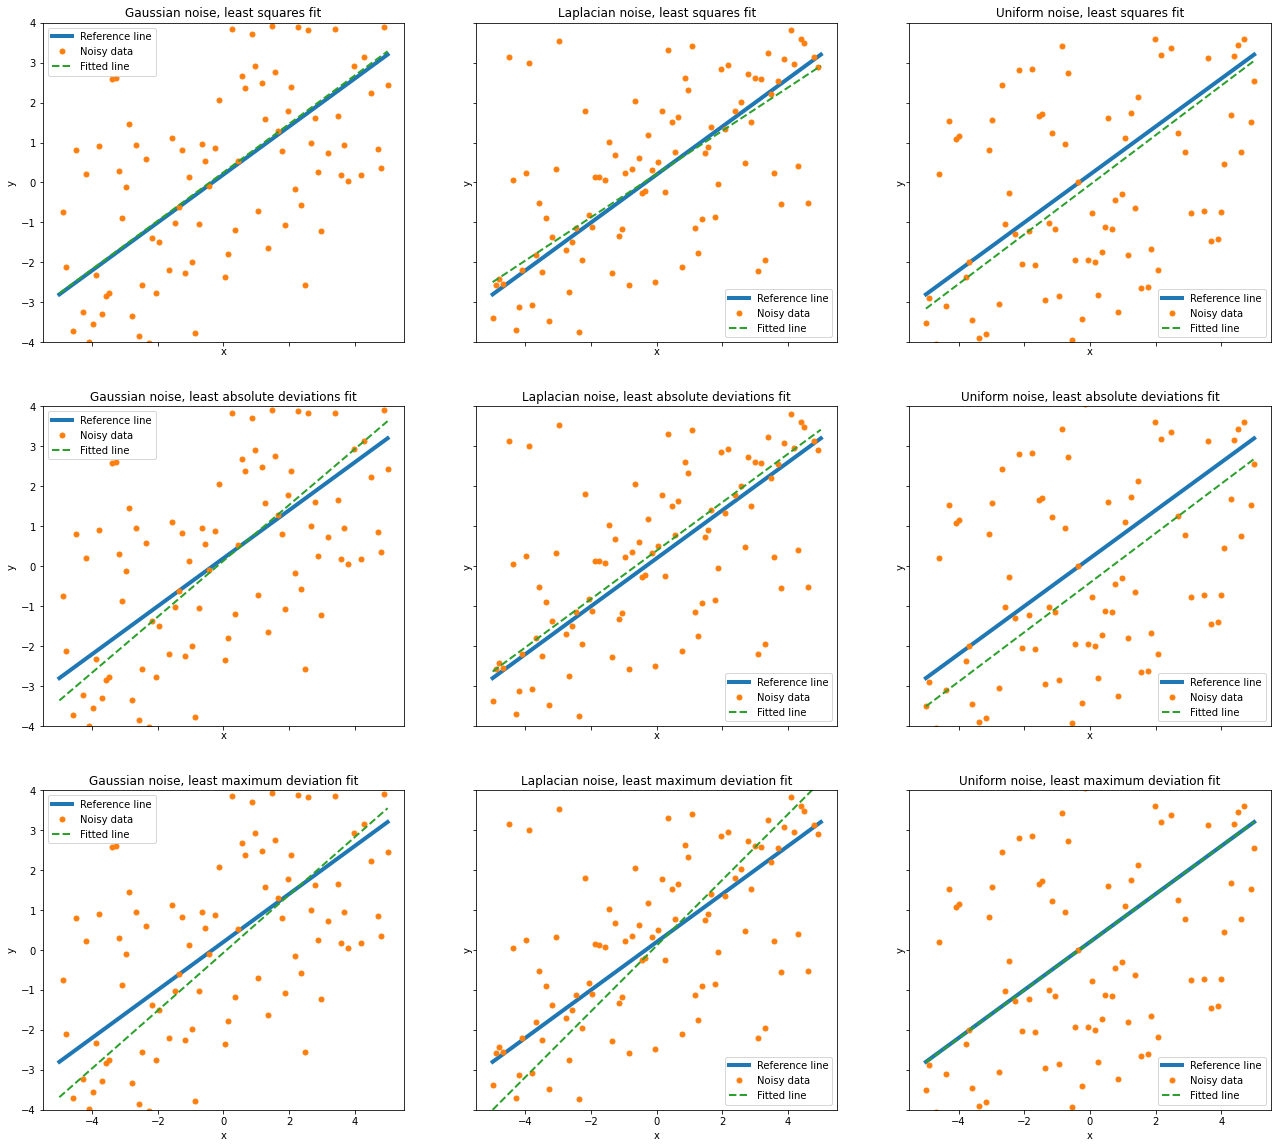

In [7]:
ynoise = (yg, yl, yu)
noise = ('Gaussian', 'Laplacian', 'Uniform')
method = ('least squares', 'least absolute deviations',
          'least maximum deviation')
solution = ((ygsqr, ylsqr, yusqr),
            (ygabs, ylabs, yuabs),
            (ygmax, ylmax, yumax))

fig, ax = plot.subplots(nrows=3, ncols=3, sharex=True, sharey=True,
                        figsize=(22, 20))
for row in range(3):
    for col in range(3):
        m, c = solution[row][col]
        plot.plot(y0, x, xlbl='x', ylbl='y', lw=4, ax=ax[row][col], fig=fig)
        plot.plot(ynoise[col], x, lw=0, ms=5.0, marker='o', ax=ax[row][col],
                  fig=fig)
        plot.plot(m * x + c, x, lw=2, ls='--',
                  title='%s noise, %s fit' % (noise[col], method[row]),
                  lgnd=('Reference line', 'Noisy data', 'Fitted line'),
                  ax=ax[row][col], fig=fig)
        ax[row][col].set_ylim(-4, 4)
fig.show()